import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

read csv

In [2]:
data_path = '../data/'+'Huawei-East-1.csv'
data = pd.read_csv(data_path, header=None,low_memory=False)
# df.columns = pd.read_csv("{}.header".format(data_path.split('.csv')[0])).columns


analyze the statsical information of the dataset

In [3]:
creation_num = 0
deletion_num = 0
for i in data[4]:
    if i == "0":
        creation_num += 1
    if i == "1":
        deletion_num += 1
print("The number of creation requests is {}".format(creation_num))
print("The number of deletion requests is {}".format(deletion_num))

time = float(data[3][241743])
second_each_day = 60*60*24
print("The time duration is about {} days".format(round(time/second_each_day),2))

cpumem_types = 0
cpumem_dict = dict()

for i in range(1,len(data)):
    if cpumem_dict.get(data[1][i]+'U'+data[2][i]+'G') is not None:
        cpumem_dict[data[1][i]+'U'+data[2][i]+'G'] += 1
    else:
        cpumem_dict[data[1][i]+'U'+data[2][i]+'G'] = 0
        cpumem_types += 1

print('The number of VM types is {}'.format(cpumem_types))

The number of creation requests is 125430
The number of deletion requests is 116313
The time duration is about 31 days
The number of VM types is 15


plot the cpus of the datasets

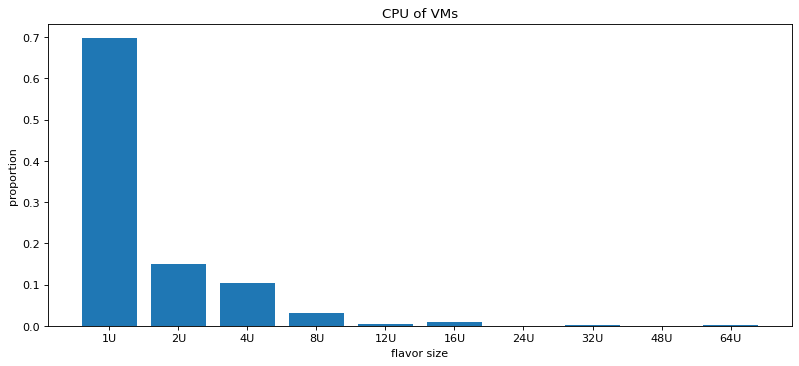

In [4]:
cpu_types = 0
cpu_dict = dict()
cpu = []
for i in data[1][1:]:
    if cpu_dict.get(i) is not None:
        cpu_dict[i] += 1
    else:
        cpu_dict[i] = 0
        cpu.append(int(i))
        cpu_types += 1

cpu.sort()
num_request_cpu = [ cpu_dict[str(i)] for i in cpu]
cpu_request_proportion = [ num_request_cpu[i]/np.array(num_request_cpu).sum() \
    for i in range(len(num_request_cpu))]

fig,ax = plt.subplots(figsize=(12,5),dpi=80)
ax.bar([str(i) for i in cpu],cpu_request_proportion ,tick_label=['{}U'.format(i) for i in cpu])
ax.set_xlabel('flavor size')
ax.set_ylabel('proportion')
ax.set_title('CPU of VMs')
plt.show()


plot the mems of the datasets

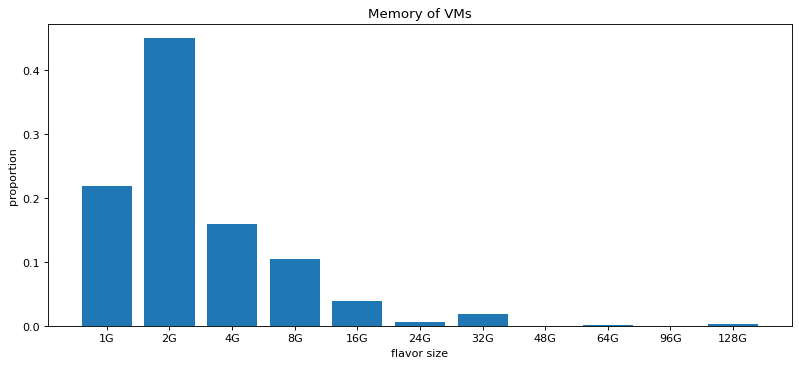

In [5]:
mem_types = 0
mem_dict = dict()
mem = []
for i in data[2][1:]:
    if mem_dict.get(i) is not None:
        mem_dict[i] += 1
    else:
        mem_dict[i] = 0
        mem.append(int(i))
        mem_types += 1

mem.sort()
num_request_mem = [ mem_dict[str(i)] for i in mem]
mem_request_proportion = [ num_request_mem[i]/np.array(num_request_mem).sum() \
    for i in range(len(num_request_mem))]

fig,ax = plt.subplots(figsize=(12,5),dpi=80)
ax.bar([str(i) for i in mem],mem_request_proportion ,tick_label=['{}G'.format(i) for i in mem])
ax.set_xlabel('flavor size')
ax.set_ylabel('proportion')
ax.set_title('Memory of VMs')
plt.show()

plot the cpumems of the datasets

Text(0.5, 1.0, 'VM type')

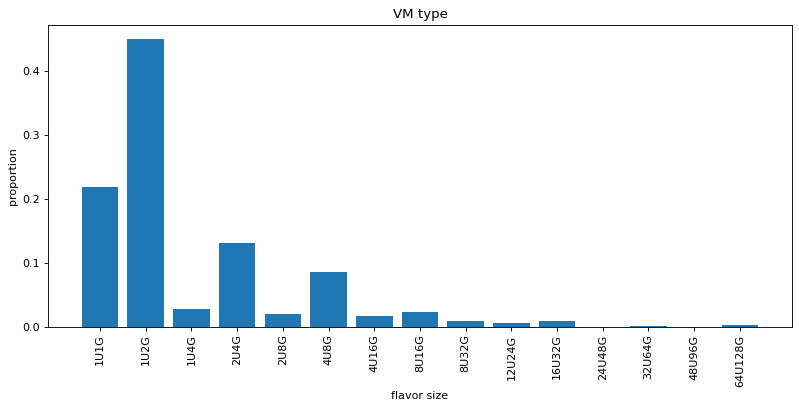

In [6]:
cpumem = ['1U1G','1U2G','1U4G','2U4G','2U8G','4U8G','4U16G','8U16G','8U32G',\
    '12U24G','16U32G','24U48G','32U64G','48U96G','64U128G',]

num_request_cpumem = [ cpumem_dict[str(i)] for i in cpumem]
cpumem_request_proportion = [ num_request_cpumem[i]/np.array(num_request_cpumem).sum() \
    for i in range(len(num_request_cpumem))]

fig,ax = plt.subplots(figsize=(12,5),dpi=80)
ax.bar([str(i) for i in cpumem],cpumem_request_proportion)
ax.set_xlabel('flavor size')
plt.xticks(rotation=90)
ax.set_ylabel('proportion')
ax.set_title('VM type')


Visualize the dynamic of virtual machine during the month:

Text(0.5, 1.0, 'Alive VMs')

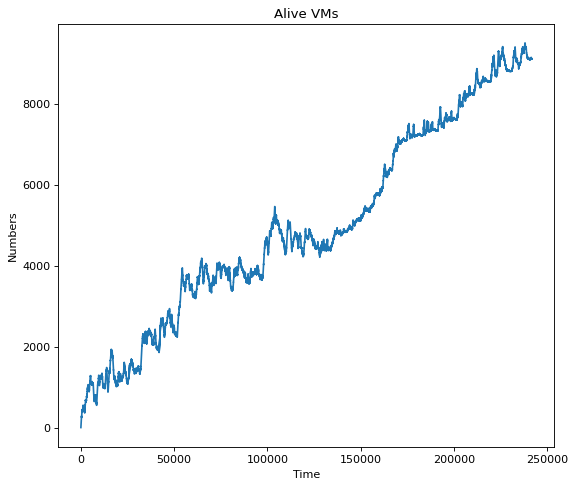

In [7]:
alive_nums = []
alive = 0
time = [i for i in range(len(data))]

for i in data[4]:
    if i == "0":
        alive += 1
    if i == "1":
        alive -= 1
    alive_nums.append(alive if alive>0 else 0)

fig,ax = plt.subplots(figsize=(8,7),dpi=80)
ax.plot(time,alive_nums)
ax.set_xlabel('Time')
ax.set_ylabel('Numbers')
ax.set_title('Alive VMs')


Text(0.5, 1.0, 'Allocated Resources')

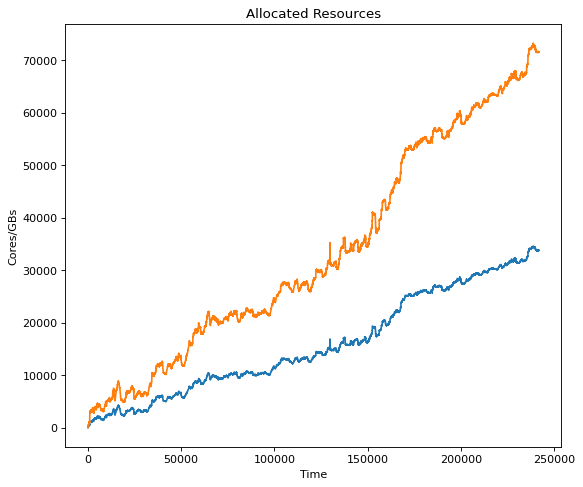

In [8]:
allocated_cpus = []
allocated_mems = []
cpu = 0
mem = 0
time = [i for i in range(1,len(data))]

for i in range(1,len(data)):
    if data[4][i] == "0":
        cpu += float(data[1][i])
        mem += float(data[2][i])
    if data[4][i] =="1":
        cpu -= float(data[1][i])
        mem -= float(data[2][i])
    
    allocated_cpus.append(cpu if cpu>0 else 0)
    allocated_mems.append(mem if mem>0 else 0)


fig,ax = plt.subplots(figsize=(8,7),dpi=80)
ax.plot(time,allocated_cpus)
ax.plot(time,allocated_mems)
ax.set_xlabel('Time')
ax.set_ylabel('Cores/GBs')
ax.set_title('Allocated Resources')
